In [1]:
#importing Required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#loading the Dataset and displaying 
df = pd.read_csv("FuelConsumption.csv")
df.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [3]:
# Get basic information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Get descriptive statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

In [6]:
# Define a function to remove outliers based on IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply the function to relevant numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers(df, col)

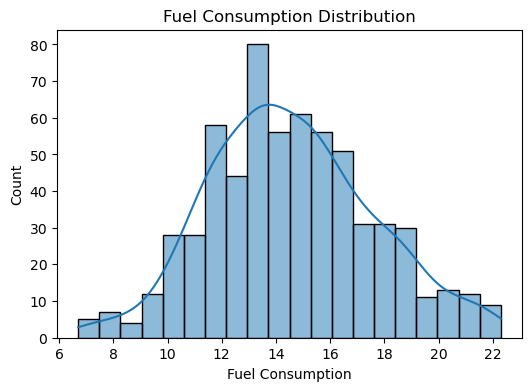

In [33]:
# Distribution Plot on Fuel consumption
plt.figure(figsize=(6, 4))
sns.histplot(df['FUEL CONSUMPTION'], bins=20, kde=True) 

plt.title('Fuel Consumption Distribution')
plt.xlabel('Fuel Consumption')
plt.ylabel('Count')

plt.show()

In [11]:
print(df.columns)

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS'],
      dtype='object')


In [21]:
# Remove any extra spaces in column names
df.columns = df.columns.str.strip()

# Now, try selecting the correct column names
features = ['ENGINE SIZE', 'CYLINDERS', 'COEMISSIONS']  # Update based on actual column names
target = 'FUEL CONSUMPTION' # Update based on actual column names

X = df[features]
y = df[target]

In [22]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#Training the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.13982442050849886
R-squared Score: 0.9847855403408188


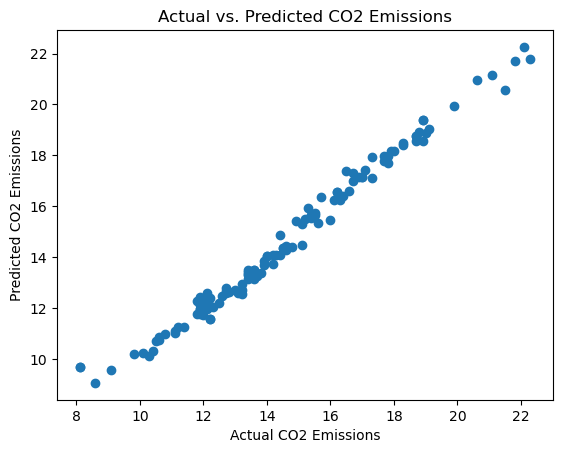

In [29]:
#visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs. Predicted CO2 Emissions")
plt.show()

<Axes: xlabel='FUEL CONSUMPTION'>

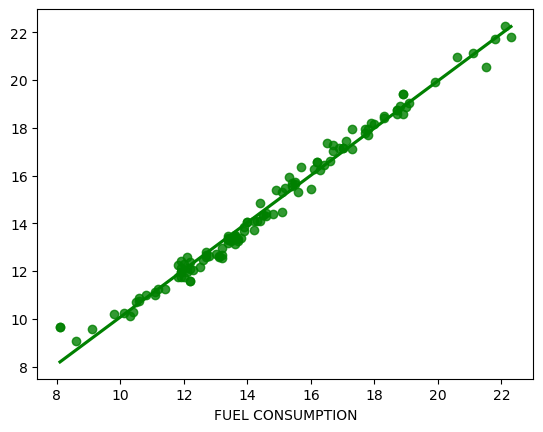

In [30]:
#plot regression model line
sns.regplot(x=y_test, y=y_pred, ci=None, color= "Green" )